# Reanalysis Errors Assessment in Brazilian Northeast Area

The main purpose of this work is to provide an error assessment when dealing with observational data and reanalysis over Brazilian Northeast. 

Here we will work with the PRCPTOT climate index. PRCPTOT is just one of the ETCCDI indices for climate changes and it is defined as

$ PRCPTOT = \sum_{i=0} ^N precip_i$ 

where $precip_i \gt 1mm$.  

We computed this index for two widespread reanalysis in the scientific word. They were NCEP NOAA and ECMWF ERA-Interim as the following code shows:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sys

# Loading data
ifile = '/media/desplein/store/projetoMeteo/retorno/pos_processed/'

in_path = ifile
station_list = pd.read_csv(in_path + 'lista2.csv', dtype={'index': str})

# defining start and end dates for timeserie
ini='19961231'
end='20151231'

# ETCCDI index for PRCPTOT. It is an climate index and is the yearly total 
# daily accumulated rainfall when rainfall is over than 1mm/day
idx = 'PRCPTOT'

# Loading data for PRCPTOT index
ecmwf = pd.read_csv(ifile + 'prcptot_ecmwf.csv', index_col=0, parse_dates=True)
noaa = pd.read_csv(ifile + 'prcptot_noaa.csv', index_col=0, parse_dates=True)
station = pd.read_csv(ifile + 'prcptot.csv', index_col=0, parse_dates=True)

# set period ini and end
ecmwf = ecmwf[ini:end].dropna(axis=1)
noaa = noaa[ini:end].dropna(axis=1)
station = station[ini:end].dropna(axis=1)

From loaded data above, we first took a look aboute overall characteristics of the three data sets. A besto way to visaully compare their statistical proprietys are the boxplots.

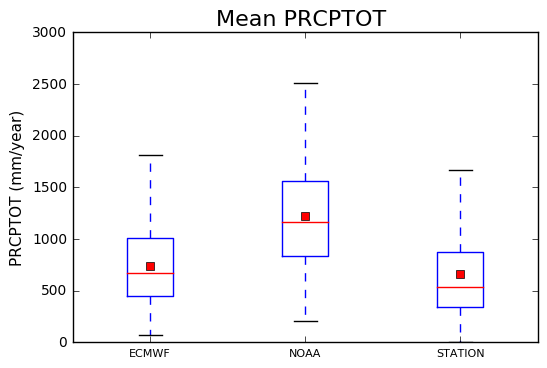

In [3]:
def global_boxplot(df, idx):
    plt.title("Mean " + idx + " ", fontsize=16)
    plt.boxplot(df,showfliers=False, showmeans=True)
    plt.xticks([1, 2, 3], ['ECMWF', "NOAA", "STATION"], fontsize=8)
    plt.ylabel(idx +" (mm/year)", fontsize=11)
    plt.show()
    
global_boxplot([ecmwf, noaa, station], idx)

As can be seen in last figure, both ECWMF and NOAA overestimates the yearly observed rainfall totals. Also, the values of PRCPTOT in the all stations are skewed which the mean being influenced by some stations with bigger rainfall volumes. NOAA reanalysis, as being a coarser grid shows bigger difference and bigger variance too, as expected.

## Error Analysis

A common way to assess the differences from numerical models outputs is the Root Square Mean Error (RMSE). Basically, given x a value modeled and y the observation,

$ RMSE = \frac{\sqrt{\sum(x - y)^2}}{N}$

The magnitude of RMSE between two time series is a good measure of how much they differ. In this case, a measure of how much the reanalysis approximates the observed real values.



In [4]:
# Compute the RMSEs 
ecmwf_err = np.sqrt((ecmwf - station)**2)
noaa_err = np.sqrt((noaa - station)**2)

/home/desplein/miniconda2/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  
/home/desplein/miniconda2/envs/py27/lib/python2.7/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


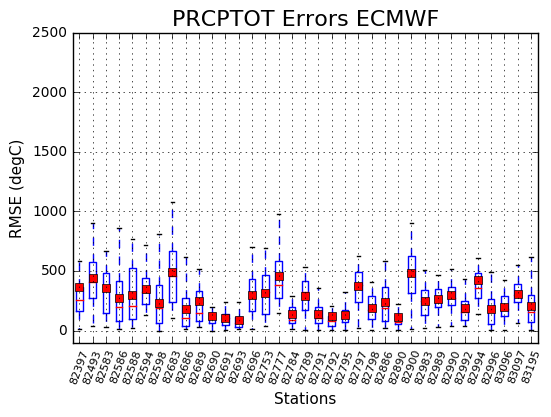

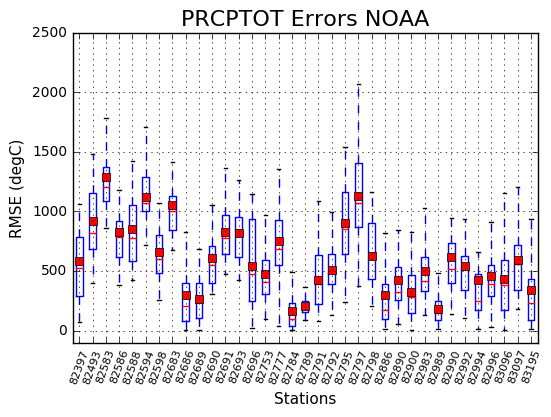

In [6]:
def boxplot(df, idx, model):
    axes = plt.gca()
    axes.set_ylim([-100,2500])


    df.boxplot(grid=False, rot=70, fontsize=10, showfliers=False, showmeans=True)
      
    plt.xticks(fontsize=8)
    plt.title(idx + " Errors " + model, fontsize=16)
    plt.legend(bbox_to_anchor=[1, 0.9], loc='right')

    
    plt.ylabel("RMSE (degC)", fontsize=11)
    plt.xlabel("Stations", fontsize=11)
    plt.grid(True)
    plt.show()
    
    

# Calling the functions for ECMWF Era-Interim reanalysis and NOAA NCEP reanalysis
boxplot(ecmwf_err, idx, 'ECMWF');
boxplot(noaa_err,  idx, 'NOAA');

The last boxplots shows the behaviour for each individual stations for both reanalysis. The error and variance for ECMWF looks consistently better than NOAA. Yet, NOAA have better results for some stations when compared with ECMWF, for instance, 82784 or 82989.

## Drawing errors over a map

In such analysis its is very important to take an spacial view of the values. Questions like "Are any model better for a given sub-region?" or "Error's growth is related with some geographical proprierty?" often arise after our previous analysis. Then, it is important to plot data over the map, keeping info about stations and its error's scores presented intuitively. Here, the markers for each station over the continent are proportional with this measured RMSEs.

In [7]:
# Lets define a function  in ordem to organize the code and make 
# it reproducible
    
def plt_map(df, idx, model):

    from mpl_toolkits.basemap import Basemap
    import matplotlib.pyplot as plt
    
    map = Basemap(projection='merc',llcrnrlon=318.5,llcrnrlat=-11.5,urcrnrlon=326,
                  urcrnrlat=-2.5,resolution='i')
    map.drawcoastlines(color='grey',  linewidth=0.5, zorder=2)
    map.drawstates(color='grey', zorder=1)
     
    lons = df['lon'].values + 360
    lats = df['lat'].values
    x,y = map(lons, lats)
       
    labels = df[0]
    for label, xpt, ypt in zip(labels, x, y):
        map.scatter(xpt, ypt, s=label*2, c='red', alpha=.3)
        map.scatter(xpt, ypt, marker='$%d$' % round(label, 0), alpha=1, s=180, edgecolor='black')


    plt.title(idx + " RMSE (mm/y) " + model, fontsize=12)
    plt.show()

In [23]:
# Now, the RMSE
mean_ecmwf_err = ecmwf_err.mean()
mean_noaa_err = noaa_err.mean()


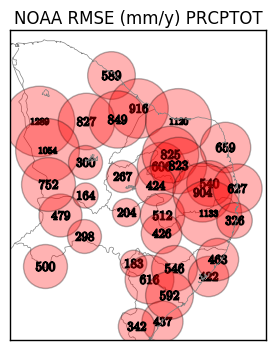

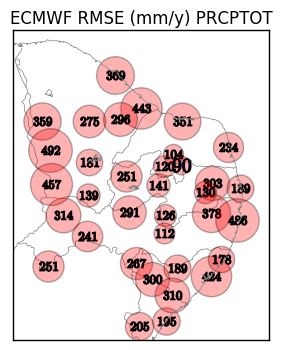

In [8]:
# Necessary to join info about stations (lat and lon coordinates) with respective RMSEs 
mean_noaa_err = mean_noaa_err.reset_index()
noaa_mean_err_final = pd.merge(station_list, mean_noaa_err, on= 'index')

mean_ecmwf_err = mean_ecmwf_err.reset_index()
ecmwf_mean_err_final = pd.merge(station_list, mean_ecmwf_err, on= 'index')

plt_map(noaa_mean_err_final, 'NOAA', idx)
plt_map(ecmwf_mean_err_final, 'ECMWF', idx)

## Interpolating data

In [18]:
def plt_map_interp(df, idx, model):
    
    from numpy.random import uniform, seed
    from matplotlib.mlab import griddata
    import matplotlib.pyplot as plt
    import numpy as np
    from mpl_toolkits.basemap import Basemap
    # make up data.
       
    lats = np.array(df['lat'])
    lons = np.array(df['lon'])
    data = np.array(df[0])
     
    lat_min = -11.0
    lat_max = -4.5
    lon_min = 319.5 - 360
    lon_max = 325.0 -360 
    data_min = min(data)
    data_max = max(data)
    
    spatial_resolution = 0.01
     
    x = np.array(lons)
    y = np.array(lats)
    z = np.array(data)
    
         
    plt.title(idx + " RMSE (degC) " + model, fontsize=12)
    
    m = Basemap(
        projection = 'merc',
        llcrnrlat=lat_min, urcrnrlat=lat_max,
        llcrnrlon=lon_min, urcrnrlon=lon_max,
        resolution='l')
    m.fillcontinents(color='#E0E0E0', lake_color='aqua',zorder=0)
    
       
    xinum = (lon_max - lon_min) / spatial_resolution
    yinum = (lat_max - lat_min) / spatial_resolution
    xi = np.linspace(lon_min, lon_max + spatial_resolution, xinum)
    yi = np.linspace(lat_min, lat_max + spatial_resolution, yinum)
    xi, yi = np.meshgrid(xi, yi)
       
    zi = griddata(x, y, z, xi, yi, interp='linear')
    
    m.drawcoastlines(color='grey',  linewidth=0.5)
    m.drawstates(color='grey', linewidth=0.5)
    
    lat, lon = m.makegrid(zi.shape[1], zi.shape[0])
    x,y = m(lat, lon)
    m.contourf(x, y, zi)
    m.colorbar()  # draw colorbar
    
    # plot data points.
    m.contour(x, y, zi,linewidths=.1, colors='#E0E0E0')
    CS = m.contour(x, y, zi, linewidths=.1, colors='#E0E0E0')
    
    plt.clabel(CS, inline=1, fontsize=9, fmt = '%1.0f', colors='k')
    
    plt.show()

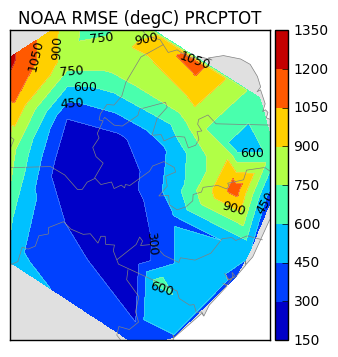

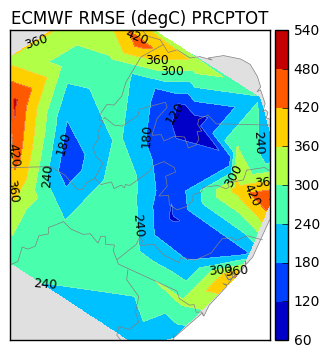

In [19]:
plt_map_interp(noaa_mean_err_final, 'NOAA', idx)
plt_map_interp(ecmwf_mean_err_final, 'ECMWF', idx)
